In [51]:
import pandas as pd
df1 = pd.read_csv("ozone_averages.csv",encoding='UTF-8')
df2 = pd.read_csv("var_for_clustering.csv", encoding='UTF-8')
df = pd.merge(df1, df2, on=['team'], how='left')

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
variables = ["mean_time", "mean_time_mod", "mean_pass", "mean_pass_mod", "mean_ozone_time", "mean_max_xG", "mean_cmltv_xG", "mean_goals", "mean_shots", "mean_passes", "mean_slotpasses", "mean_fwdtime", "mean_dmentime", "mean_penalties", "mean_puckretrievals", "mean_icings"]

## ['mean_ozone_time',	'mean_max_xG', 'mean_cmltv_xG',	'mean_goals', 'mean_shots', 'mean_passes', 'mean_slotpasses', 'mean_fwdtime', 'mean_dmentime', 'mean_penalties', 'mean_puckretrievals', 'mean_icings', 'mean_time', 'median_time', 'mean_pass', 'median_pass', 'mean_time_mod', 'median_time_mod',	'mean_pass_mod', 'median_pass_mod', 'zero_pass_shot_count']
scaled_data = scaler.fit_transform(df[variables])
scaled_data

array([[ 1.25544336,  1.31156703,  0.76560864,  0.77447401,  1.34388   ,
         1.40332575,  1.38856697, -0.02761718,  1.60529493,  0.46164488,
         1.10604682,  1.04651529,  1.58049967, -0.91192664,  1.12637282,
         1.07476557],
       [-0.54596723, -0.42029185, -0.8195564 , -0.80866099, -1.5488895 ,
         1.09751121,  1.11382248,  1.02321407,  0.10805316, -1.18143437,
        -0.75481057, -1.88021169, -0.51852941,  1.14043429, -1.27762591,
        -1.01711736],
       [ 0.85191543,  0.47745432,  1.15146835,  0.97506411, -0.25452726,
        -1.38623474, -1.41674581,  0.43680392, -0.09474999,  0.56080415,
        -0.87562624, -0.93279585,  0.40432278, -0.36357864, -0.68158183,
        -0.5426151 ],
       [ 1.07832714,  0.73813129,  1.01723453,  0.812941  ,  0.28841417,
        -1.02959128, -1.09058534,  1.03738503, -2.13464959,  0.48082415,
        -0.90989096,  0.08093728,  0.52713365, -1.71720494, -1.51209743,
        -1.22263528],
       [ 1.08876342,  1.54213859,  1

In [53]:
from sklearn.mixture import GaussianMixture
num_clusters = 5
gmm = GaussianMixture(n_components=num_clusters, random_state=54)
gmm.fit(scaled_data)

GaussianMixture(n_components=5, random_state=54)

In [54]:
df['GMM_Cluster'] = gmm.predict(scaled_data) + 1
probabilities = gmm.predict_proba(scaled_data)
df[[f'Cluster{i}' for i in range(1, num_clusters+1)]] = pd.DataFrame(probabilities, index=df.index)
df['Highest_Prob'] = df[[f'Cluster{i}' for i in range(1, num_clusters+1)]].max(axis=1)
df

,team,mean_ozone_time,mean_max_xG,mean_cmltv_xG,mean_goals,mean_shots,mean_passes,mean_slotpasses,mean_fwdtime,mean_dmentime,...,mean_pass_mod,median_pass_mod,zero_pass_shot_count,GMM_Cluster,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Highest_Prob
0,503,7.813045,0.053965,0.055604,0.050000,1.144595,1.917568,0.327027,4.476919,2.409648,...,3.173966,2,822,4,0.0,0.0,0.0,1.0,0.0,1.0
1,524,6.426980,0.052760,0.054457,0.059896,1.117188,1.628906,0.263021,3.641494,1.939428,...,2.850801,2,811,3,0.0,0.0,1.0,0.0,0.0,1.0
2,628,7.047171,0.042970,0.043895,0.054374,1.113475,1.934988,0.258865,3.911931,2.146163,...,3.214912,2,912,5,0.0,0.0,0.0,0.0,1.0,1.0
3,634,7.307321,0.044376,0.045257,0.060029,1.076135,1.920937,0.257687,4.201298,2.173675,...,3.181818,2,737,5,0.0,0.0,0.0,0.0,1.0,1.0
4,686,8.069191,0.052947,0.054954,0.041543,1.124629,2.197329,0.317507,4.757459,2.368922,...,3.342936,2,729,4,0.0,0.0,0.0,1.0,0.0,1.0
5,726,7.541144,0.045033,0.047177,0.033613,1.122449,1.837935,0.306122,4.318791,2.144481,...,3.133110,2,894,1,1.0,0.0,0.0,0.0,0.0,1.0
6,792,6.920916,0.049347,0.050702,0.034294,1.124829,1.893004,0.326475,4.183705,1.885012,...,2.988506,2,783,1,1.0,0.0,0.0,0.0,0.0,1.0
7,795,6.516029,0.040745,0.041544,0.052069,1.113485,1.560748,0.238985,3.813181,1.896894,...,2.683805,2,778,2,0.0,1.0,0.0,0.0,0.0,1.0
8,814,6.798044,0.050211,0.051777,0.047030,1.129950,1.726485,0.308168,4.053143,1.755669,...,2.804424,2,859,3,0.0,0.0,1.0,0.0,0.0,1.0
9,825,7.800082,0.047159,0.048162,0.063100,1.102881,2.032922,0.248285,4.419524,2.466740,...,3.276903,2,762,4,0.0,0.0,0.0,1.0,0.0,1.0


In [55]:
import matplotlib.pyplot as plt


In [56]:
summary = df.groupby('GMM_Cluster')[variables].mean().sort_values(by='mean_ozone_time', ascending = False)
summary.style.background_gradient(cmap='Greens')
summary.style.bar(cmap='RdYlGn', align='mean')

,mean_time,mean_time_mod,mean_pass,mean_pass_mod,mean_ozone_time,mean_max_xG,mean_cmltv_xG,mean_goals,mean_shots,mean_passes,mean_slotpasses,mean_fwdtime,mean_dmentime,mean_penalties,mean_puckretrievals,mean_icings
GMM_Cluster,,,,,,,,,,,,,,,,
4,10.209727,12.297264,2.710051,3.264601,7.894106,0.051357,0.052907,0.051548,1.124035,2.049273,0.297607,4.551301,2.415103,0.007550,0.989746,0.013565
1,9.667375,11.454037,2.583362,3.060808,7.231030,0.047190,0.048940,0.033953,1.123639,1.865470,0.316299,4.251248,2.014746,0.008146,0.935781,0.010032
5,10.059364,11.822117,2.721463,3.198365,7.177246,0.043673,0.044576,0.057201,1.094805,1.927963,0.258276,4.056614,2.159919,0.005010,0.880076,0.005742
3,9.128672,11.136738,2.354536,2.871045,6.892148,0.050255,0.051671,0.052436,1.115076,1.735845,0.294135,4.068652,1.881115,0.010108,0.931651,0.007977
2,8.475404,10.556126,2.154799,2.683805,6.516029,0.040745,0.041544,0.052069,1.113485,1.560748,0.238985,3.813181,1.896894,0.005340,0.893191,0.009346


IndexError: index 5 is out of bounds for axis 0 with size 5

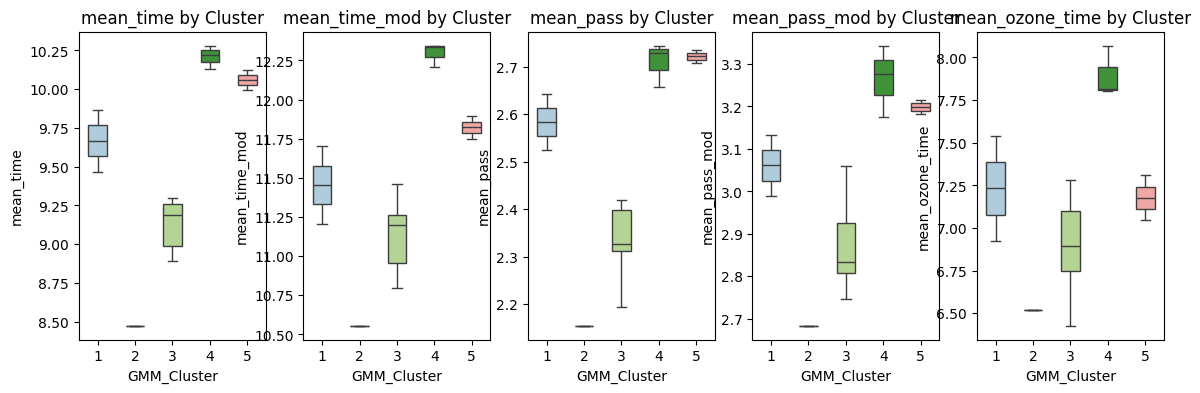

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 4))
for idx, variable in enumerate(variables):
    sns.boxplot(ax=axes[idx], data=df, x='GMM_Cluster', y=variable, showfliers=False, hue='GMM_Cluster', palette='Paired', width=0.5)
    #sns.stripplot(ax=axes[idx], data=df, x='GMM_Cluster', y=variable, color='black', size=5, jitter=True, alpha=0.2)
    axes[idx].set_title(f'{variable} by Cluster')
    axes[idx].legend([],[], frameon=False)
plt.tight_layout()

In [58]:
table = df[['team', "mean_time", "mean_time_mod", "mean_pass", "mean_pass_mod", "mean_ozone_time", "mean_max_xG", "mean_cmltv_xG", "mean_goals", "mean_shots", "mean_passes", "mean_slotpasses", "mean_fwdtime", "mean_dmentime", "mean_penalties", "mean_puckretrievals", "mean_icings", 'Cluster1','Cluster2', 'Cluster3', 'Cluster4', 'Cluster5']].sort_values(by=['Cluster5', 'Cluster4', 'Cluster3', 'Cluster2', 'Cluster1'], ascending=False)
table.round(2).style.background_gradient(cmap='Greens', axis=0, subset=['Cluster1','Cluster2', 'Cluster3', 'Cluster4', 'Cluster5']).bar(subset=variables, cmap='RdYlGn', align='mean').format("{:.2f}", subset=table.select_dtypes(include=['float', 'int']).columns)

,team,mean_time,mean_time_mod,mean_pass,mean_pass_mod,mean_ozone_time,mean_max_xG,mean_cmltv_xG,mean_goals,mean_shots,mean_passes,mean_slotpasses,mean_fwdtime,mean_dmentime,mean_penalties,mean_puckretrievals,mean_icings,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
2,628.00,10.00,11.75,2.74,3.21,7.05,0.04,0.04,0.05,1.11,1.93,0.26,3.91,2.15,0.01,0.90,0.01,0.00,0.00,0.00,0.00,1.00
3,634.00,10.12,11.89,2.71,3.18,7.31,0.04,0.05,0.06,1.08,1.92,0.26,4.20,2.17,0.00,0.86,0.00,0.00,0.00,0.00,0.00,1.00
0,503.00,10.22,12.21,2.66,3.17,7.81,0.05,0.06,0.05,1.14,1.92,0.33,4.48,2.41,0.01,0.99,0.01,0.00,0.00,0.00,1.00,0.00
4,686.00,10.13,12.34,2.74,3.34,8.07,0.05,0.05,0.04,1.12,2.20,0.32,4.76,2.37,0.01,0.95,0.01,0.00,0.00,0.00,1.00,0.00
9,825.00,10.28,12.34,2.73,3.28,7.80,0.05,0.05,0.06,1.10,2.03,0.25,4.42,2.47,0.01,1.02,0.01,0.00,0.00,0.00,1.00,0.00
1,524.00,9.22,11.26,2.34,2.85,6.43,0.05,0.05,0.06,1.12,1.63,0.26,3.64,1.94,0.01,0.87,0.01,0.00,0.00,1.00,0.00,0.00
8,814.00,8.89,10.80,2.31,2.80,6.80,0.05,0.05,0.05,1.13,1.73,0.31,4.05,1.76,0.01,0.92,0.00,0.00,0.00,1.00,0.00,0.00
10,855.00,9.30,11.14,2.55,3.06,7.13,0.05,0.05,0.06,1.10,1.93,0.35,4.21,2.03,0.01,0.99,0.01,0.00,0.00,1.00,0.00,0.00
11,869.00,9.28,11.27,2.32,2.81,7.28,0.05,0.05,0.05,1.13,1.79,0.31,4.39,1.88,0.01,1.00,0.01,0.00,0.00,1.00,0.00,0.00
12,877.00,8.93,10.90,2.42,2.95,6.99,0.05,0.05,0.04,1.13,1.81,0.25,4.23,1.84,0.01,0.93,0.01,0.00,0.00,1.00,0.00,0.00


In [59]:
table.to_csv('FinalClusters.csv', index=False)